In [5]:
import pandas as pd
import json

data = pd.read_json('test.json')
data = pd.DataFrame(data)

testData = data.loc[0,'text']
testData = str(testData)
testData = testData.replace("'","")
testData = testData.replace("—","")

data


,year,group,text
0,1869,1,[Wer heutzutage von Aeschylus Sophocles Euripi...
1,1869,2,"[Das Christenthum, ursprünglich Sache des Tale..."
2,1869,3,[Wir sind leider gewöhnt die Künste in der Ver...
3,1870,4,"[Erlangen Samstag den 20. August., Hier seit a..."
4,1870,5,[Gedanken zu\n„die Tragoedie und die\nFreigeis...
...,...,...,...
171,1888,21,"[Teichm<üller>, Scept<iques> gr<ecs>, Spir, A<..."
172,1888,22,[Randbemerkung zu einer niaserie anglaise. — „...
173,1888,23,[Auch ein Gebot der Menschenliebe. — Es giebt ...
174,1888,24,[Ecce homo\nOder:\nwarum ich Einiges mehr weis...


In [6]:
import nltk

tokens = [t for t in testData.lower().split()] #Converting the text into tokens for NLTK analysis

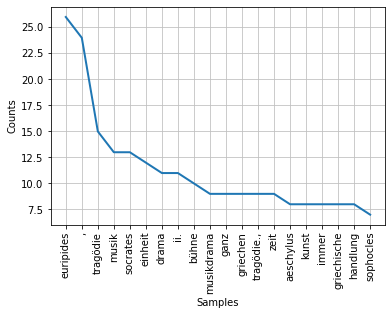

In [7]:
from nltk.corpus import stopwords

sr = stopwords.words('german')
#additional stopwords
stopwords_new = ['.', 'ii.']
sr.append(stopwords_new)

clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('german'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

freq.plot(20, cumulative=False)


In [8]:
freq

FreqDist({'euripides': 26, ',': 24, 'tragödie': 15, 'musik': 13, 'socrates': 13, 'einheit': 12, 'drama': 11, 'ii.': 11, 'bühne': 10, 'musikdrama': 9, ...})

In [41]:
from nltk.probability import FreqDist

schopenhauer = r'\b[Ss]chopenhauer\w+'

freq['musik']
freq.freq('musik') ##Percentage of the whole corpus that uses this word


0.0033028455284552847

In [60]:
tknz = nltk.Text(clean_tokens)

tknz.similar('euripides')

wissen


In [70]:
from nltk.tokenize import word_tokenize
import re

cleancsv = pd.read_csv('check.csv', index_col='index')

schopenhauer = r'\b[Ss]chopenhauer\w+'

df = pd.DataFrame(cleancsv)
txt = df.text.apply(word_tokenize)

df['scho'] = txt.apply(lambda x: nltk.Text(x).findall(r'\b[Ss]chopenhauer\w+'))
df['schoCount'] = len(df['scho'])

df.to_csv('checking.csv')
# txt = txt.apply(lambda x: nltk.Text(x))
# txt = txt.apply(lambda x: x.findall(schopenhauer))



chopenhauersch

chopenhauerische

chopenhauer; chopenhauerische
chopenhauerische; chopenhauerische
chopenhauer; chopenhauer

chopenhauer
chopenhauer; chopenhauer; chopenhauerische






chopenhauer; chopenhauer; chopenhauer; chopenhauerische



chopenhauer; chopenhauer





chopenhauer
chopenhauer

chopenhauerisch; chopenhauerisch; chopenhauerisc; chopenhauerische

chopenhauer; chopenhauerische; chopenhauerisch; chopenhauer;
chopenhauer
chopenhauer; chopenhauerische; chopenhauerisch





chopenhauer


chopenhauer


chopenhauerische; chopenhauer; chopenhauerisch

chopenhauerisc







chopenhauersche



chopenhauer; chopenhauer; chopenhauer



chopenhauerische; chopenhauersch























chopenhauerisch; chopenhauersche; chopenhauersche






chopenhauer

















chopenhauer
chopenhauersche






chopenhauerisch








chopenhauer; chopenhauer
chopenhauerianernvo; chopenhauer; chopenhauer
chopenhauersche






chopenhauer

chopenhauersche

chopenhauer; chopenhauer


In [73]:
csv = pd.read_csv('checking.csv')
df2 = pd.DataFrame(csv)
df2

,index,year,group,text,scho,schoCount
0,0,1869,1,Wer heutzutage von Aeschylus Sophocles Euripid...,NaN,176
1,1,1869,2,"Das Christenthum, ursprünglich Sache des Talen...",NaN,176
2,2,1869,3,Wir sind leider gewöhnt die Künste in der Vere...,NaN,176
3,3,1870,4,Erlangen Samstag den 20. August.Hier seit acht...,NaN,176
4,4,1870,5,Gedanken zu „die Tragoedie und die Freigeister...,NaN,176
...,...,...,...,...,...,...
171,171,1888,21,Teichm<üller>Scept<iques> gr<ecs>SpirA<ugust> ...,NaN,176
172,172,1888,22,Randbemerkung zu einer niaserie anglaise. — „W...,NaN,176
173,173,1888,23,Auch ein Gebot der Menschenliebe. — Es giebt F...,NaN,176
174,174,1888,24,Ecce homo Oder: warum ich Einiges mehr weiss. ...,NaN,176


In [105]:
txt.apply(len)#number of words

index
0      7846
1      2622
2      5713
3      1156
4      6998
       ... 
171     783
172    3116
173    4198
174    6300
175    2992
Name: text, Length: 176, dtype: int64

In [107]:
import re

schopenhauer = re.compile(r'\b[Ss]chopenhauer\w+')

txt = txt.apply(lambda x: nltk.Text(x).count('Schopenhauer'))

txt.head()

TypeError: 'int' object is not iterable